# CodeRefinery pre-workshop survey

As part of the registration to a CodeRefinery workshop, participants are asked to fill in a survey. This notebook contains analysis of the survey results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glob
from collections import Counter, defaultdict

In [2]:
# larger font in seaborn plots
sns.set(font_scale=2)

## Helper functions

In [3]:
# reduce annoying differences in column titles
def normalize_column_title(s):
    s = s.replace("Pre-workshop survey: ", "")
    s = s.replace("<strong>", "")
    s = s.replace("</strong>", "")
    return s

def read_csv_file(file_name):
    _df = pd.read_csv(file_name)
    _df = _df.rename(normalize_column_title, axis='columns')
    return _df

def extract_helper(df, approx_column_text):
    matching_columns = [c for c in df.columns if approx_column_text in c]
    if len(matching_columns) > 0:
        column = matching_columns[0]
        counts = df[column].value_counts()
        return counts.to_dict()
    else:
        return {}

def extract_counts(approx_column_text):
    counts_typeform = extract_helper(df_typeform, approx_column_text)
    counts_indico = extract_helper(df_indico, approx_column_text)
    combined = dict(Counter(counts_typeform) + Counter(counts_indico))
    counts = dict(sorted(combined.items(), key=lambda item: item[1], reverse=True))
    if "Mac OS X" in counts.keys():
        counts["macOS"] += counts["Mac OS X"]
        del counts["Mac OS X"]
    keys = list(counts.keys())
    values = [counts[k] for k in keys]
    return keys, values

def split_on_semicolon(keys, values):
    counts = defaultdict(int)
    for i, key in enumerate(keys):
        v = values[i]
        for word in key.split("; "):
            counts[word] += v
    counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
    new_keys = list(counts.keys())
    new_values = [counts[k] for k in new_keys]
    return new_keys, new_values

## Read data

In [4]:
dfs = [read_csv_file(f) for f in glob.glob('data/typeform/20*/*.csv')]
df_typeform = pd.concat(dfs, ignore_index=False, keys=None)

dfs = [read_csv_file(f) for f in glob.glob('data/indico/20*/*.csv')]
df_indico = pd.concat(dfs, ignore_index=False, keys=None)

In [5]:
print(f"number of typeform responses: {len(df_typeform)}")
print(f"number of indico responses: {len(df_indico)}")
print(f"number of all survey responses: {len(df_typeform) + len(df_indico)}")

number of typeform responses: 407
number of indico responses: 663
number of all survey responses: 1070


## Job title/ position/ occupation

values summing up to 301


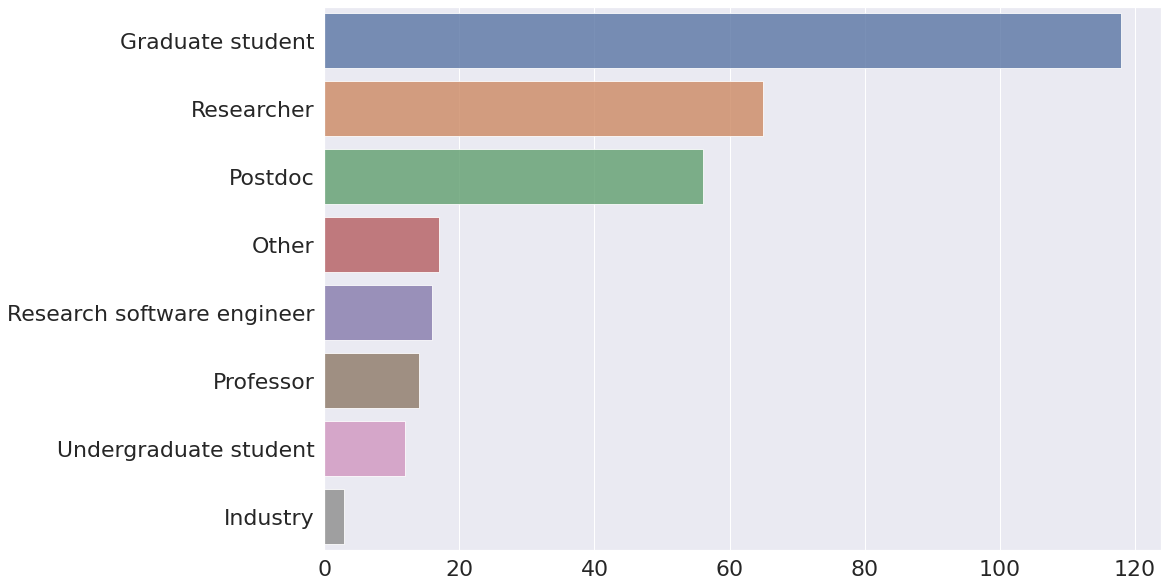

In [6]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("your current position")
sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/position.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Academic discipline

values summing up to 838


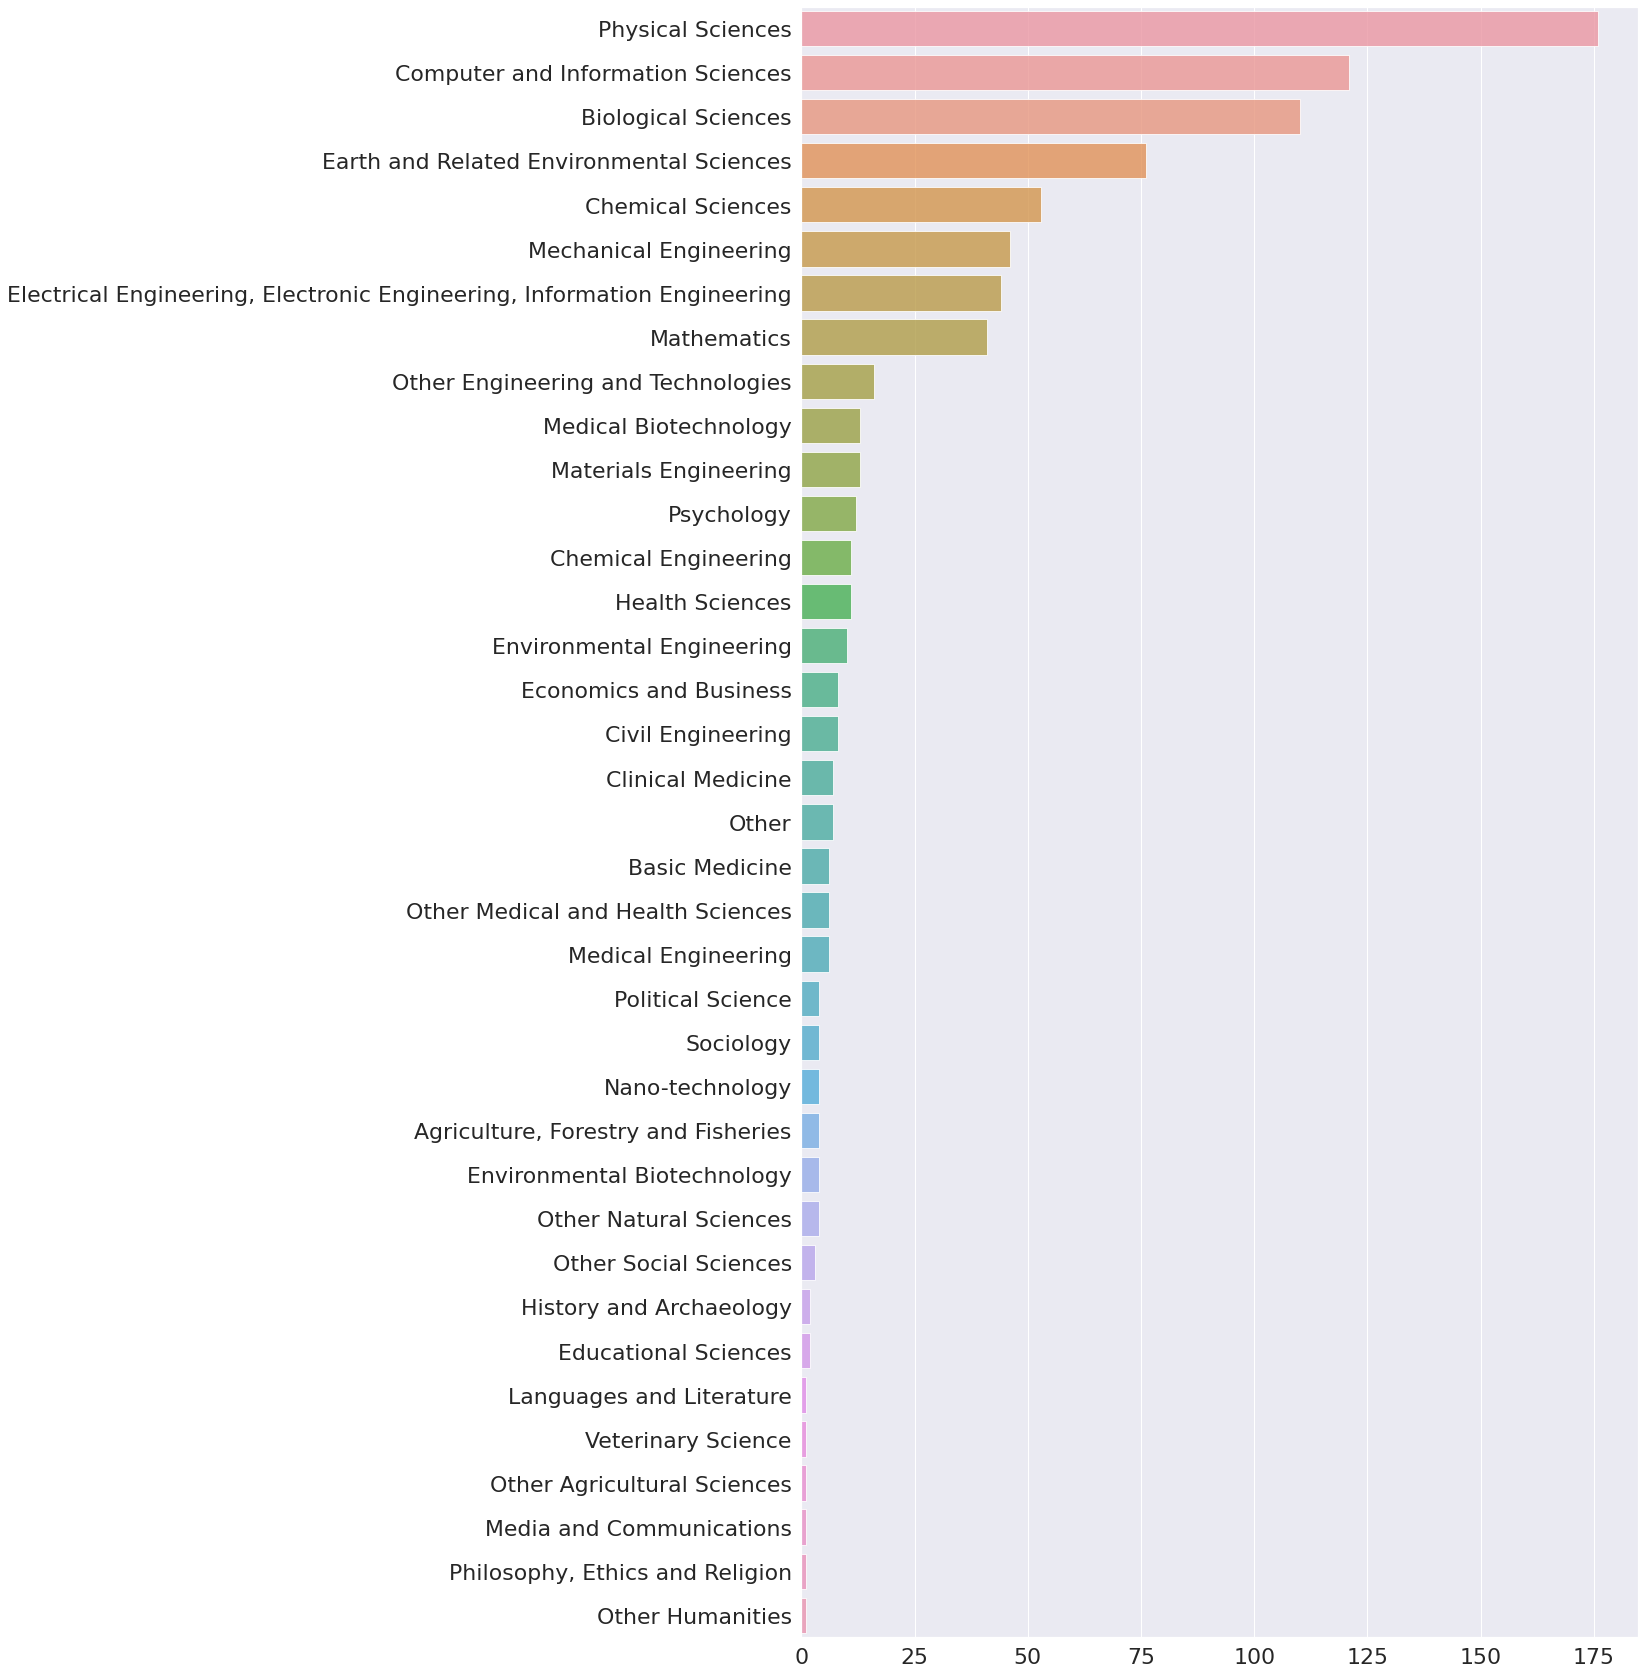

In [7]:
f, ax = plt.subplots(figsize=(15, 30))

keys, values = extract_counts("academic discipline")
sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/discipline.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Operating system

values summing up to 1067


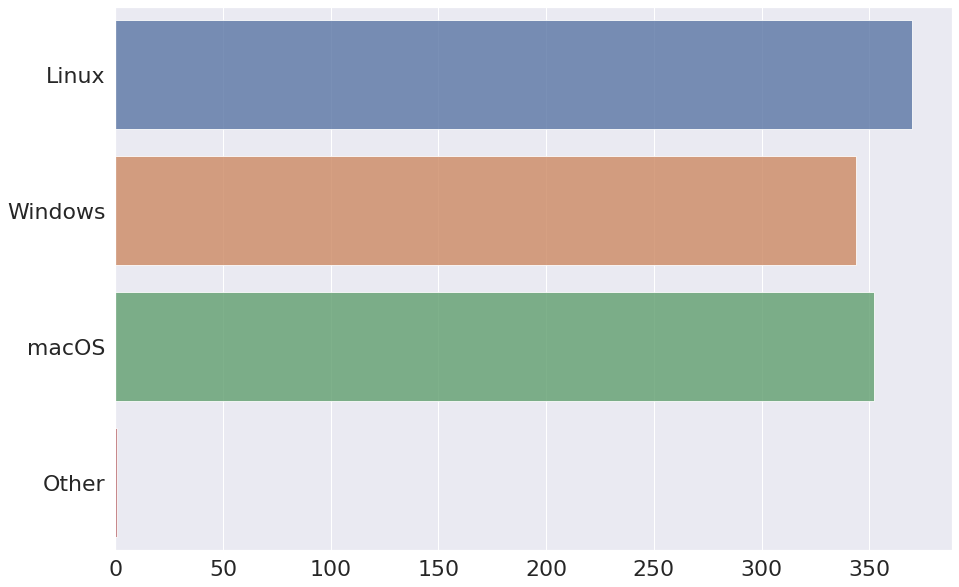

In [8]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("operating system that you will use")
sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/os.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Version control

values summing up to 739


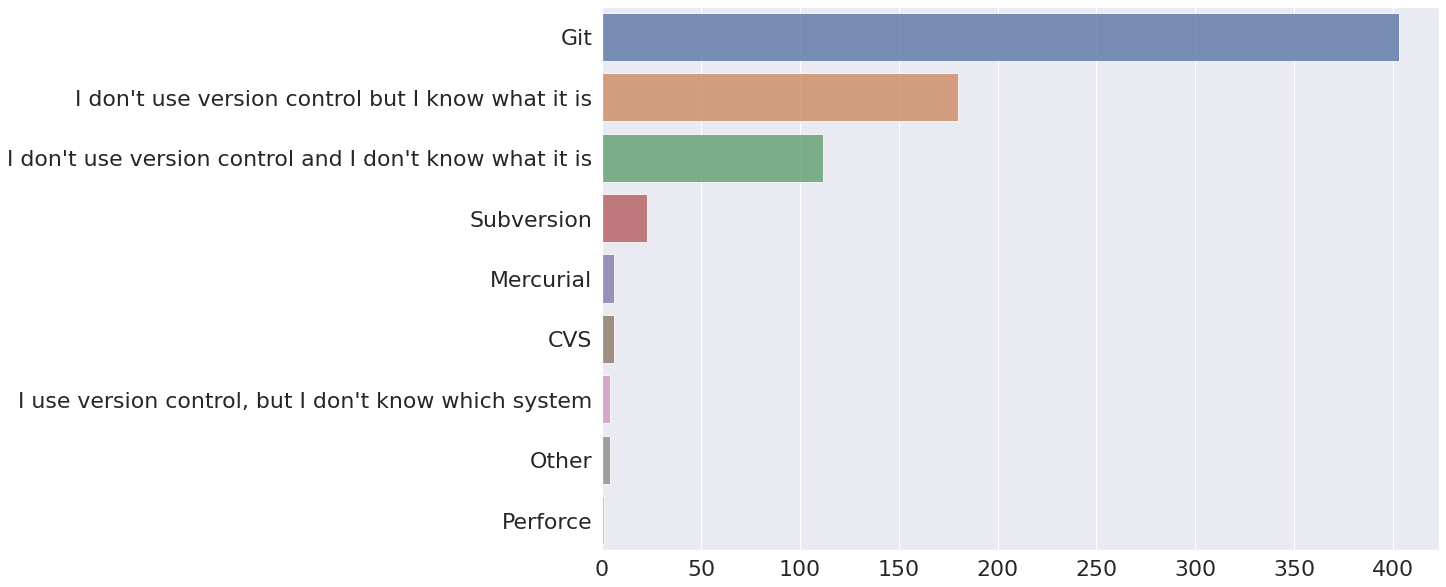

In [9]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Are you using version control")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/version-control.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Programming languages

values summing up to 1495


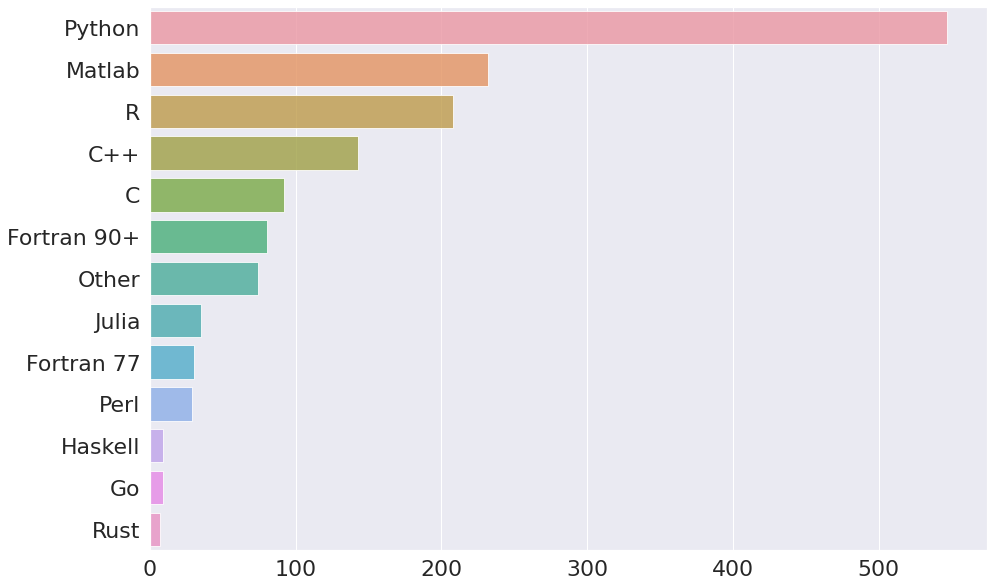

In [10]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Which programming languages are you using or will you use in your projects")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8)
f.savefig("figures/languages.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Tests and automated testing

values summing up to 301


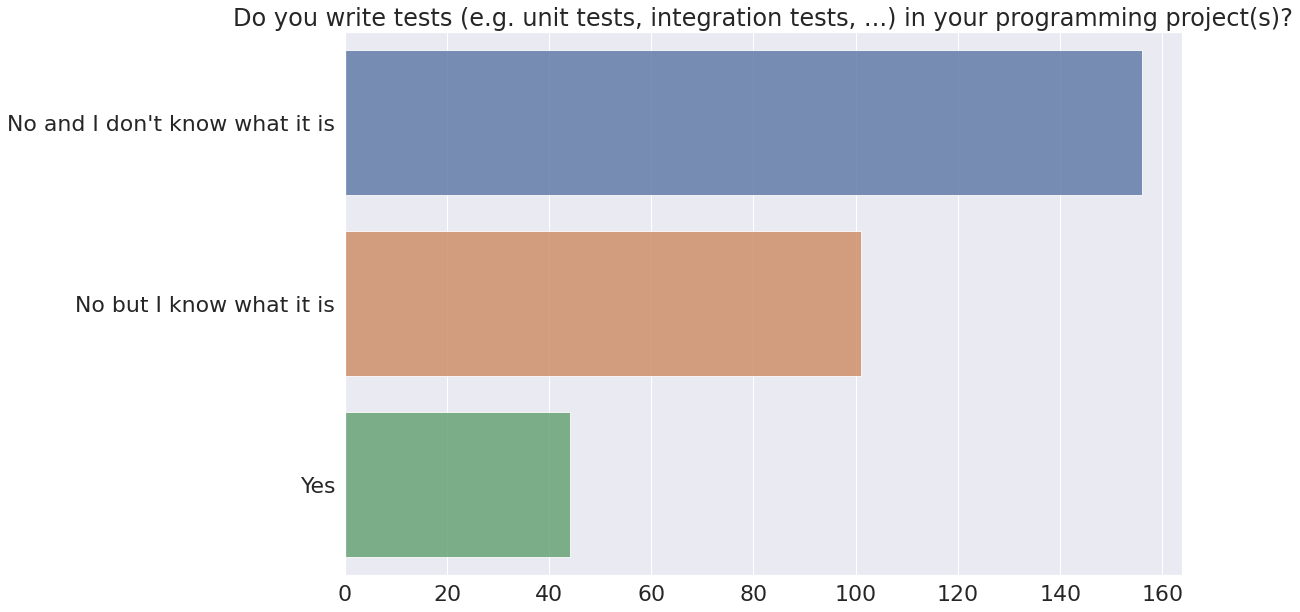

In [11]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Do you write tests")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Do you write tests (e.g. unit tests, integration tests, ...) in your programming project(s)?")
f.savefig("figures/tests.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

values summing up to 687


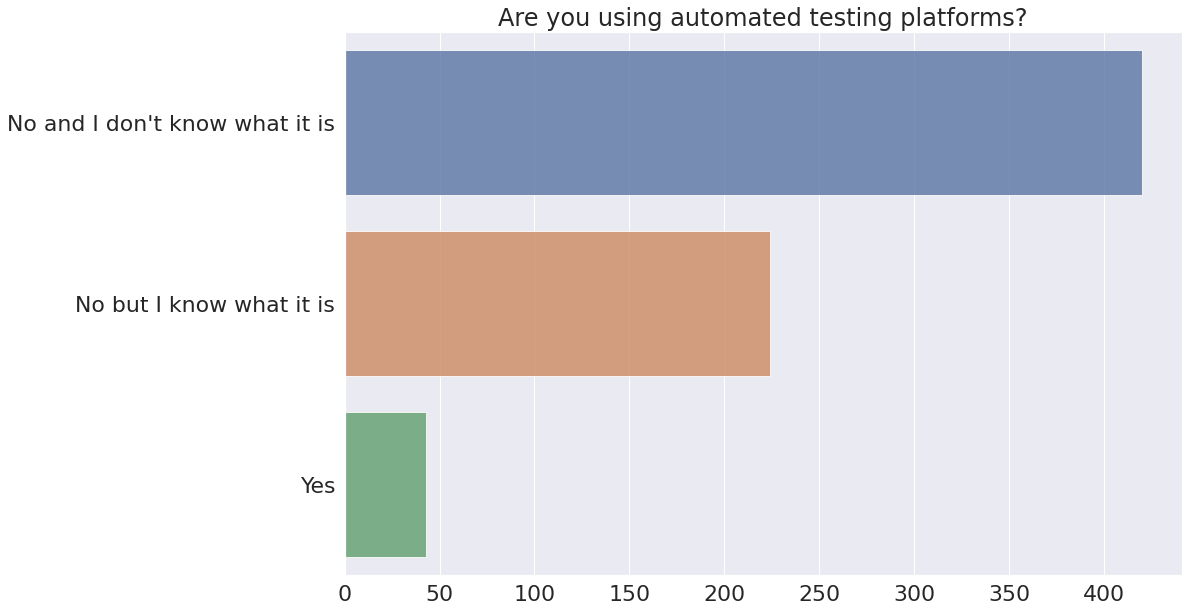

In [12]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Are you using automated testing")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using automated testing platforms?")
f.savefig("figures/automated-testing.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Code review

values summing up to 1049


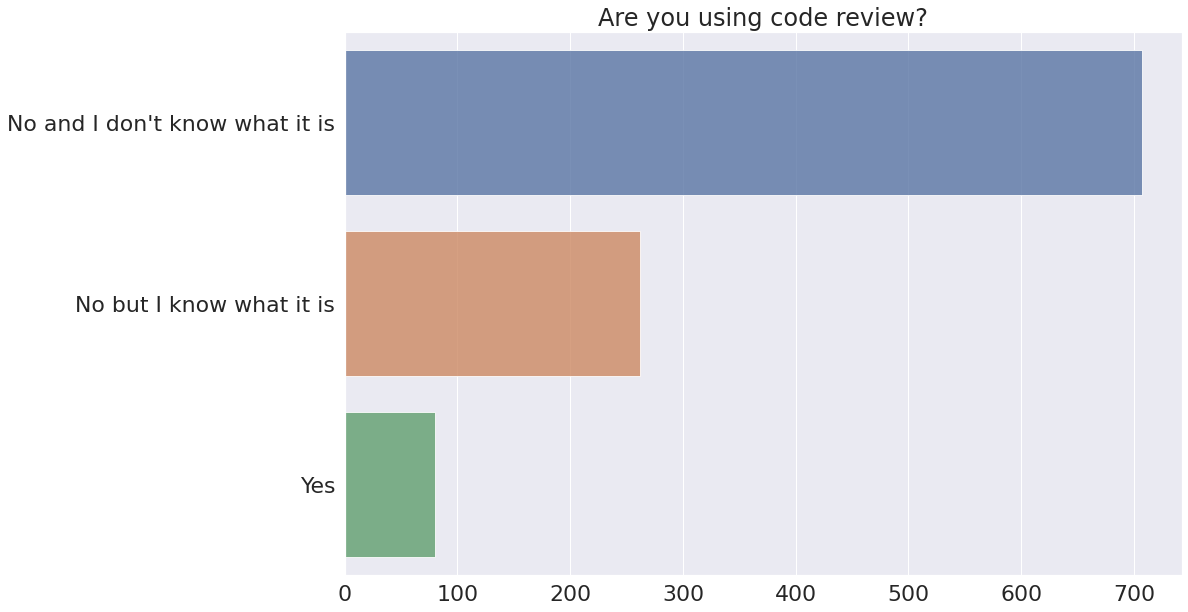

In [13]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("code review")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using code review?")
f.savefig("figures/code-review.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Jupyter

values summing up to 301


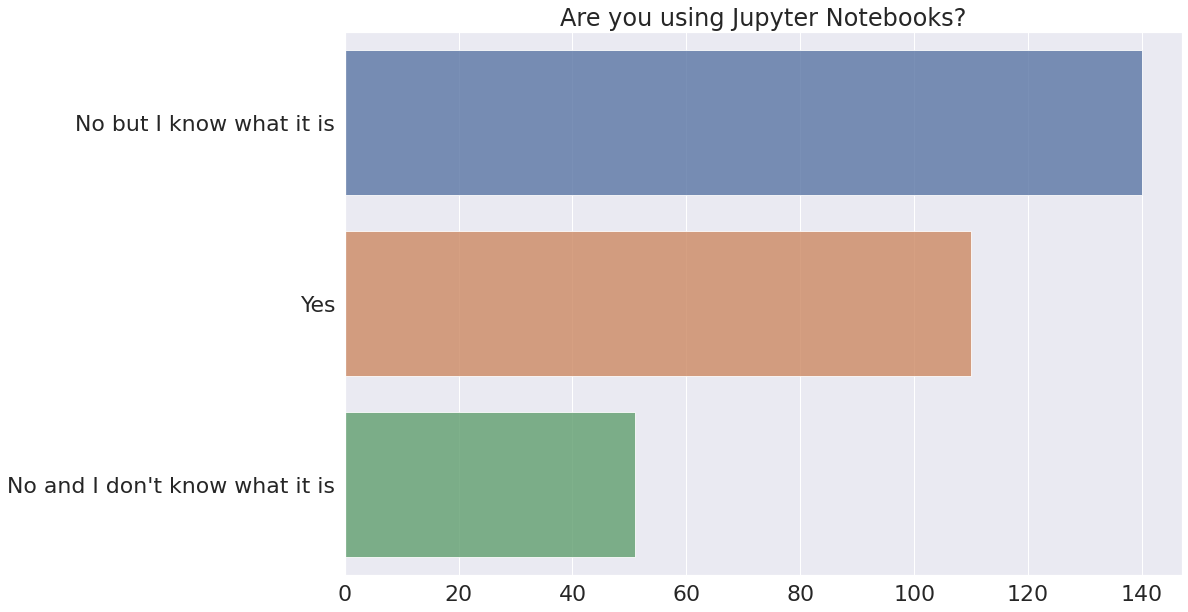

In [14]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Are you using Jupyter Notebooks in your programming")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using Jupyter Notebooks?")
f.savefig("figures/jupyter.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Documentation

values summing up to 1313


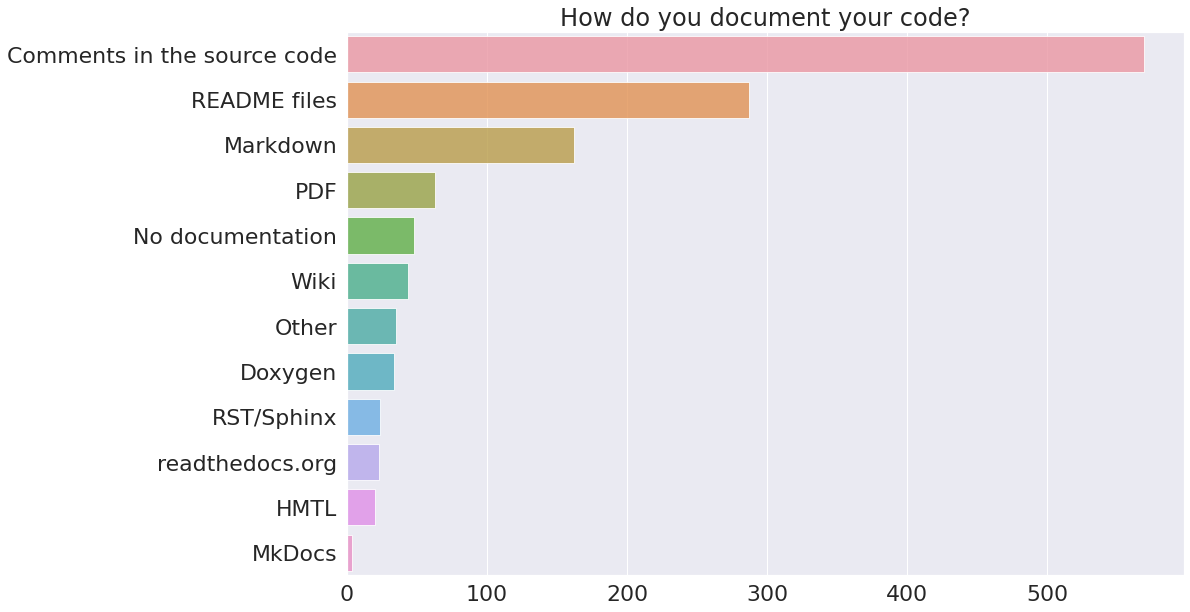

In [15]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("How do you document your code?")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("How do you document your code?")
f.savefig("figures/documentation.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Web-based collaborative tools

values summing up to 805


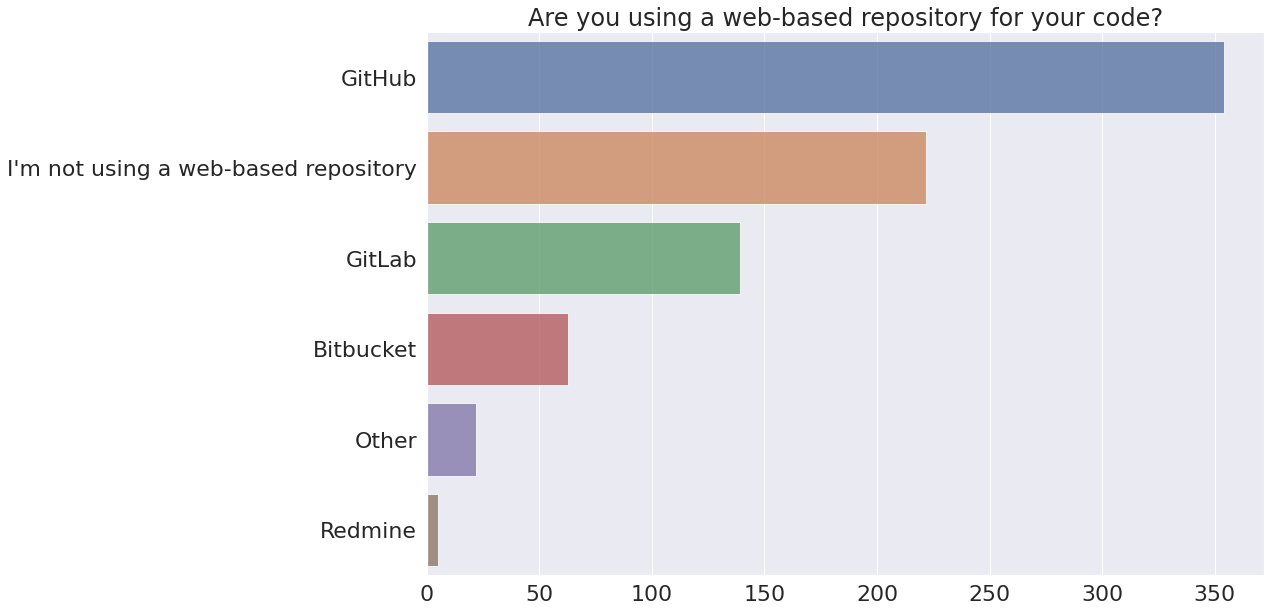

In [16]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Are you using a web-based repository for your code")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Are you using a web-based repository for your code?")
f.savefig("figures/web-tools.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## Programming experience

values summing up to 1070


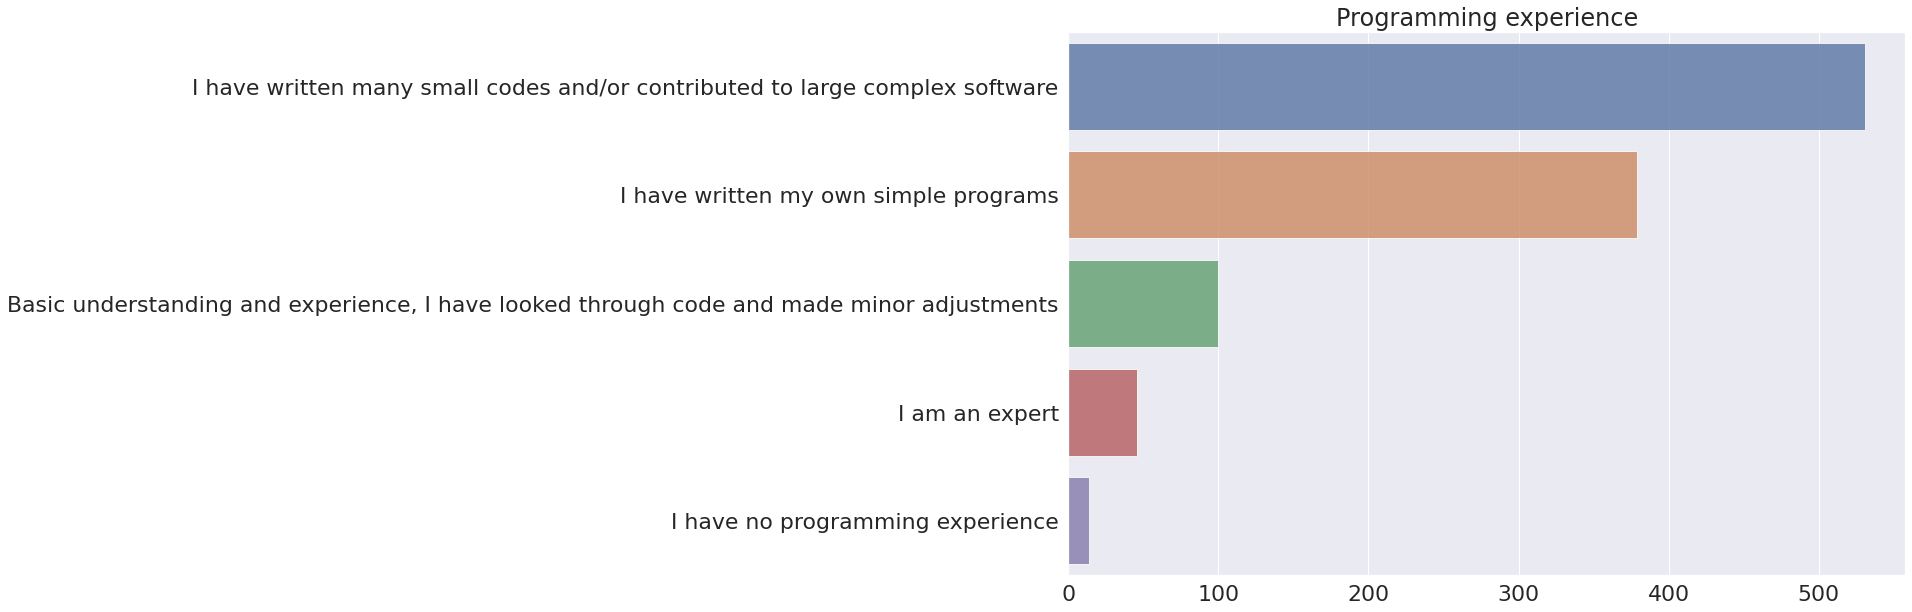

In [17]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("How would you describe your programming experience")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Programming experience")
f.savefig("figures/programming-experience.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")

## How did you find out about the project?

values summing up to 299


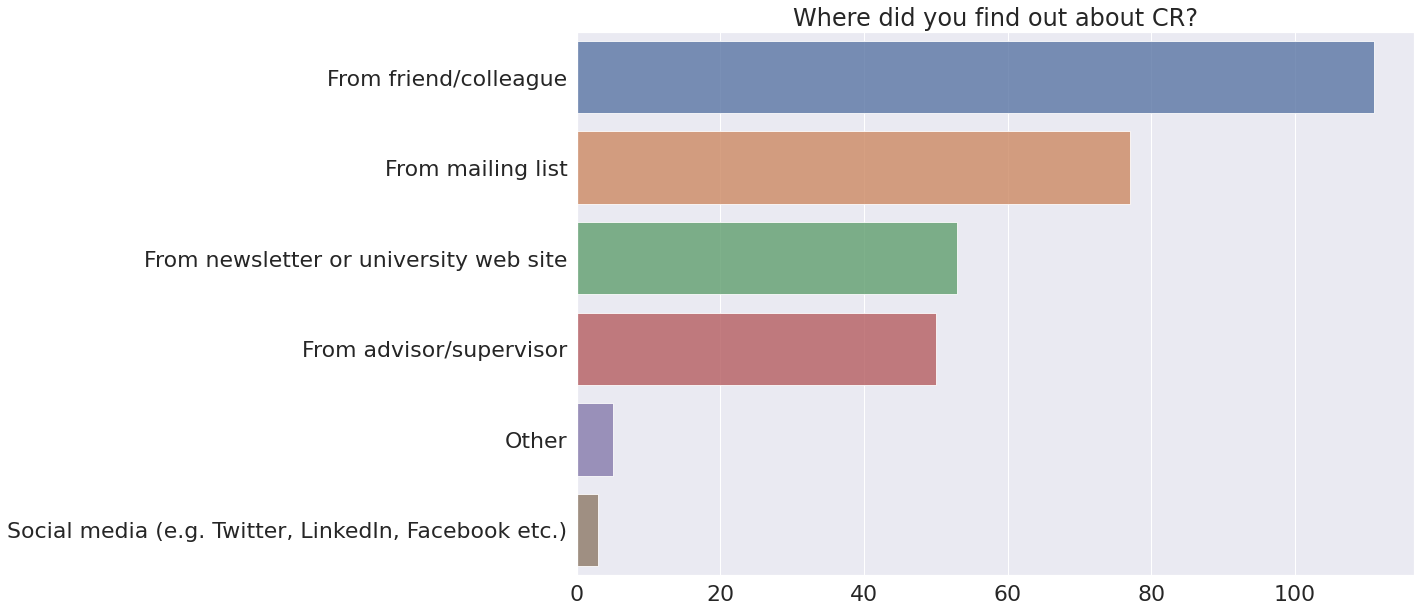

In [18]:
f, ax = plt.subplots(figsize=(15, 10))

keys, values = extract_counts("Where did you find out")
keys, values = split_on_semicolon(keys, values)

sns.barplot(y=keys, x=values, alpha=0.8).set_title("Where did you find out about CR?")
f.savefig("figures/where.png", bbox_inches = 'tight')

print(f"values summing up to {sum(values)}")